In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [14]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Feature Scaling

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow Method

In [16]:
wcss = []
for k in range(1, 11):
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    km.fit(X_scaled)
    wcss.append(km.inertia_)


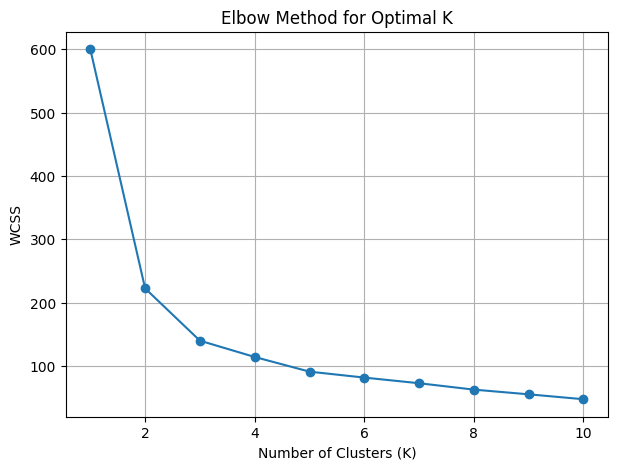

In [17]:
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


### Silhouette Analysis

In [18]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


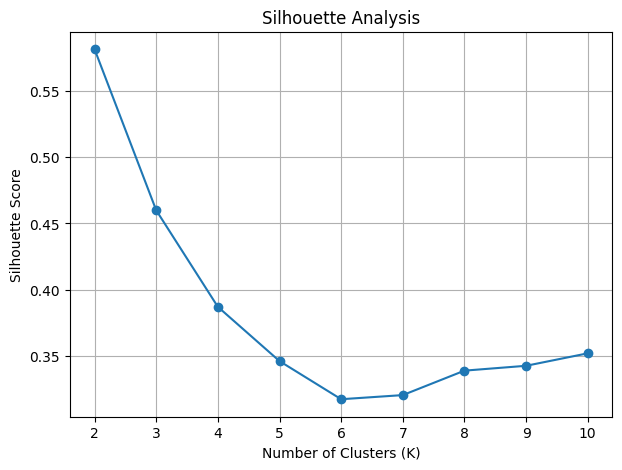

In [19]:
plt.figure(figsize=(7,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)
plt.show()


Highest score at K = 2, but K = 3 is chosen for meaningful grouping.

### K-Means Model (K = 3)

In [22]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Cluster Visualization (2D)

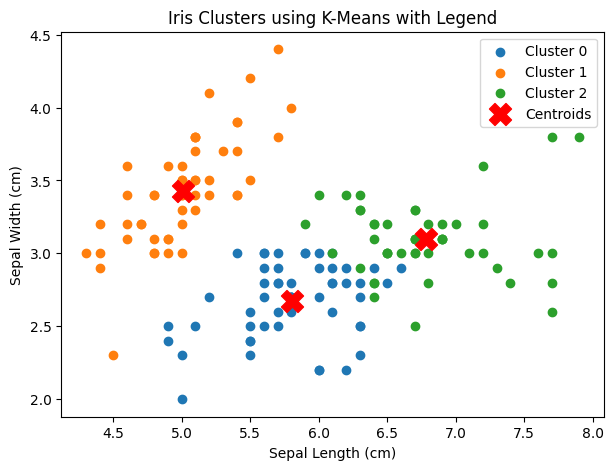

In [34]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(7,5))
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['sepal length (cm)'],
        cluster_data['sepal width (cm)'],
        label=f'Cluster {cluster_id}'
    )
plt.scatter(
    centroids[:, 0],   # sepal length
    centroids[:, 1],   # sepal width
    c='red',
    marker='X',
    s=250,
    label='Centroids'
)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Clusters using K-Means with Legend")
plt.legend()
plt.show()

### Cluster Centers

In [35]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=feature_names)
centers_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.428000,1.462000,0.246000
2,6.780851,3.095745,5.510638,1.972340
